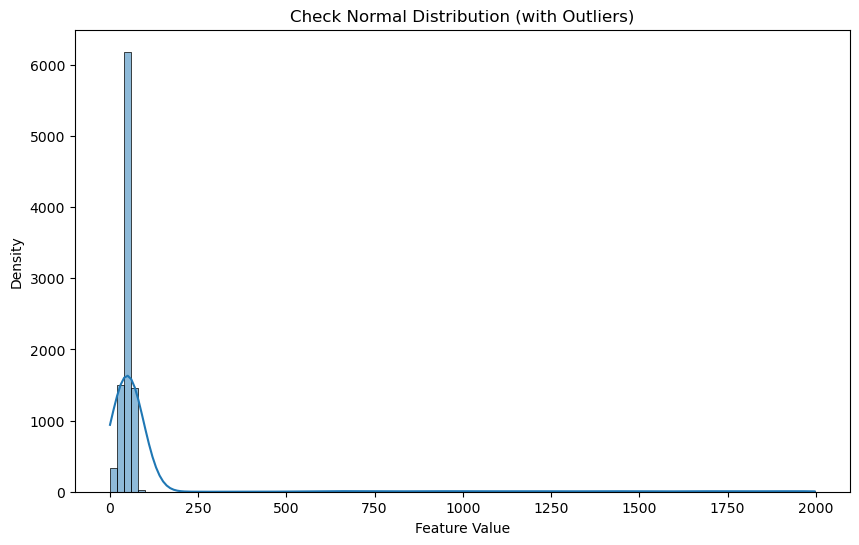

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:/Users/mohdd/OneDrive/Documents/Desktop/GenAI/Function_transformer/huge_dataset_with_outliers.csv')

plt.figure(figsize=(10, 6))

sns.histplot(
    df["feature_value"],
    bins=100,
    kde=True
)

plt.title("Check Normal Distribution (with Outliers)")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.show()


Lower Bound: 19.69764775427516
Upper Bound: 80.49091562449618


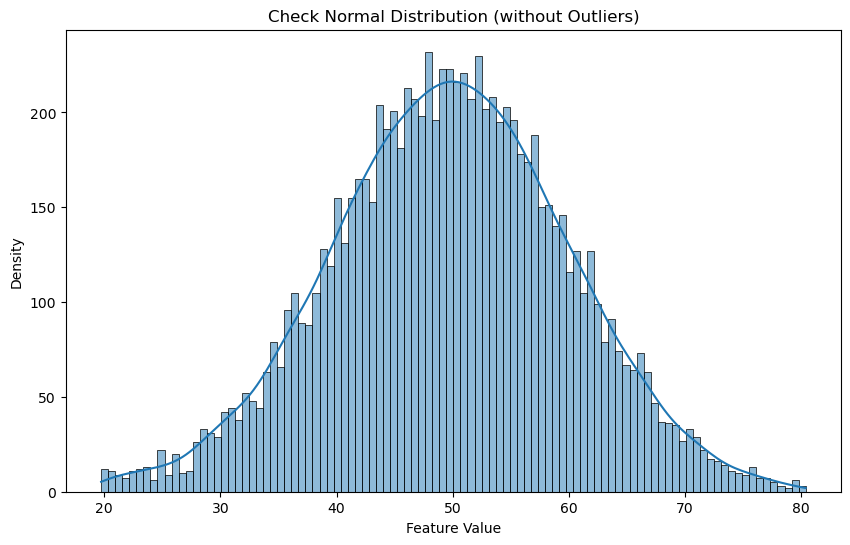

In [33]:
q1 = df["feature_value"].quantile(0.25)
q3 = df["feature_value"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

df = df[(df["feature_value"] > lower_bound) & (df["feature_value"] < upper_bound)]

plt.figure(figsize=(10, 6))

sns.histplot(
    df["feature_value"],
    bins=100,
    kde=True
)

plt.title("Check Normal Distribution (without Outliers)")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.show()

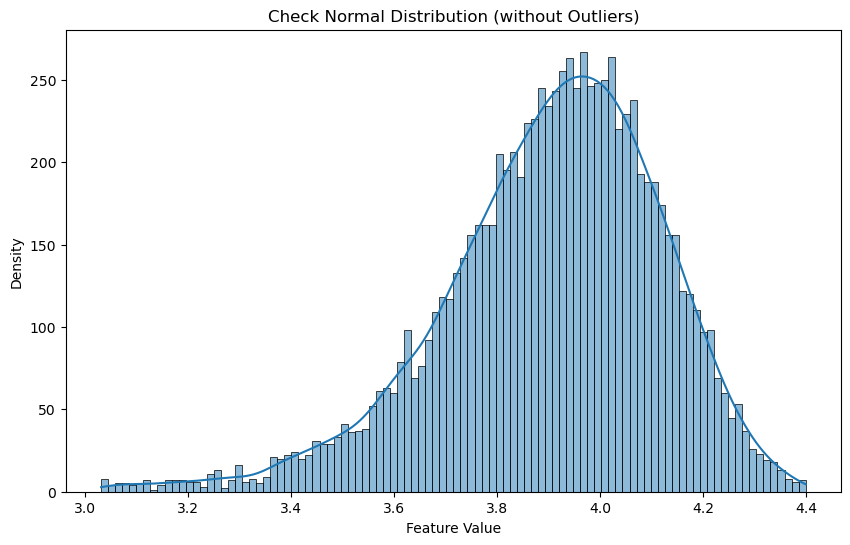

In [35]:
# function transformer

from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)

transformer.fit(df["feature_value"].values.reshape(-1, 1))

transformed_values = transformer.transform(df["feature_value"].values.reshape(-1, 1))

df["feature_value"] = transformed_values

# check in the graph

plt.figure(figsize=(10, 6))

sns.histplot(
    df["feature_value"],
    bins=100,
    kde=True
)

plt.title("Check Normal Distribution (without Outliers)")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.show()



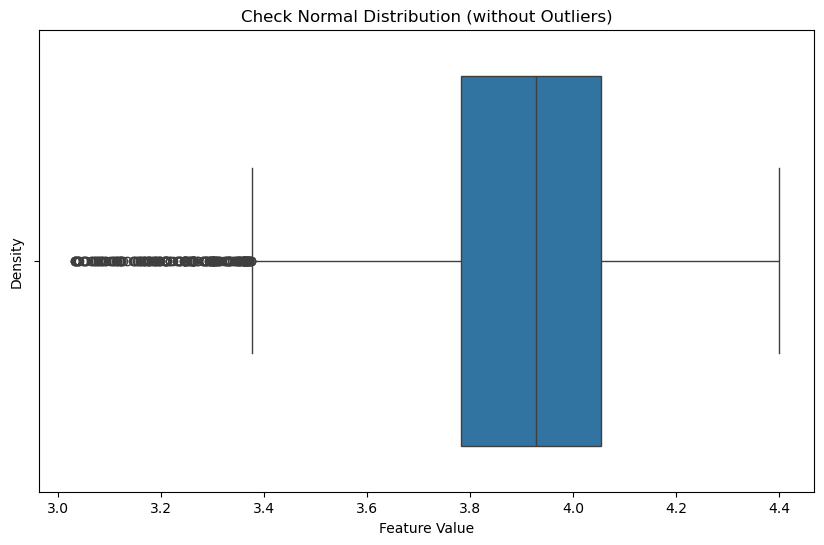

In [36]:
# check the outlier in the graph too ib boxplot
plt.figure(figsize=(10, 6))

sns.boxplot(
    x=df["feature_value"]
)

plt.title("Check Normal Distribution (without Outliers)")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.show()


In [46]:
print("Custom Function or Lambda Function")
array_two_dim = np.array([[1, 2], [3, 4], [5, 6]])
print(array_two_dim)

tf = FunctionTransformer(func=lambda x : x**2, validate=True)

tf.fit(array_two_dim)

transformed_values = tf.transform(array_two_dim)

print(transformed_values)



print("Square Root")
array_square = np.array([[1, 4], [9, 16], [25, 36]])
print(array_square)

tf = FunctionTransformer(func=np.sqrt, validate=True)

tf.fit(array_square)

transformed_values = tf.transform(array_square)

print(transformed_values)


Custom Function or Lambda Function
[[1 2]
 [3 4]
 [5 6]]
[[ 1  4]
 [ 9 16]
 [25 36]]
Square Root
[[ 1  4]
 [ 9 16]
 [25 36]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]
